In [83]:
# EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Statistics
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [84]:
pip install ucimlrepo

In [85]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [86]:
df = pd.concat([X, y], axis=1)


In [87]:
df.shape

(253680, 22)

# **Data Type and non null value count**

In [88]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

# **5 Intial Samples**

In [89]:
df.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


# **Unique Value in Each Feature**

In [90]:
df.nunique()

,0
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


# ***For Each Feature Find what are uique value and its count***

In [91]:
for col in df.columns:
    print(f"\n{'='*50}")
    print(f" Column: {col}")
    print(f"Unique values count: {df[col].nunique()}")
    print(df[col].value_counts().sort_index())



 Column: HighBP
Unique values count: 2
HighBP
0    144851
1    108829
Name: count, dtype: int64

 Column: HighChol
Unique values count: 2
HighChol
0    146089
1    107591
Name: count, dtype: int64

 Column: CholCheck
Unique values count: 2
CholCheck
0      9470
1    244210
Name: count, dtype: int64

 Column: BMI
Unique values count: 84
BMI
12      6
13     21
14     41
15    132
16    348
     ... 
91      1
92     32
95     12
96      1
98      7
Name: count, Length: 84, dtype: int64

 Column: Smoker
Unique values count: 2
Smoker
0    141257
1    112423
Name: count, dtype: int64

 Column: Stroke
Unique values count: 2
Stroke
0    243388
1     10292
Name: count, dtype: int64

 Column: HeartDiseaseorAttack
Unique values count: 2
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64

 Column: PhysActivity
Unique values count: 2
PhysActivity
0     61760
1    191920
Name: count, dtype: int64

 Column: Fruits
Unique values count: 2
Fruits
0     92782
1    160898
Name: coun

# **Correlation Matrix B/w features**

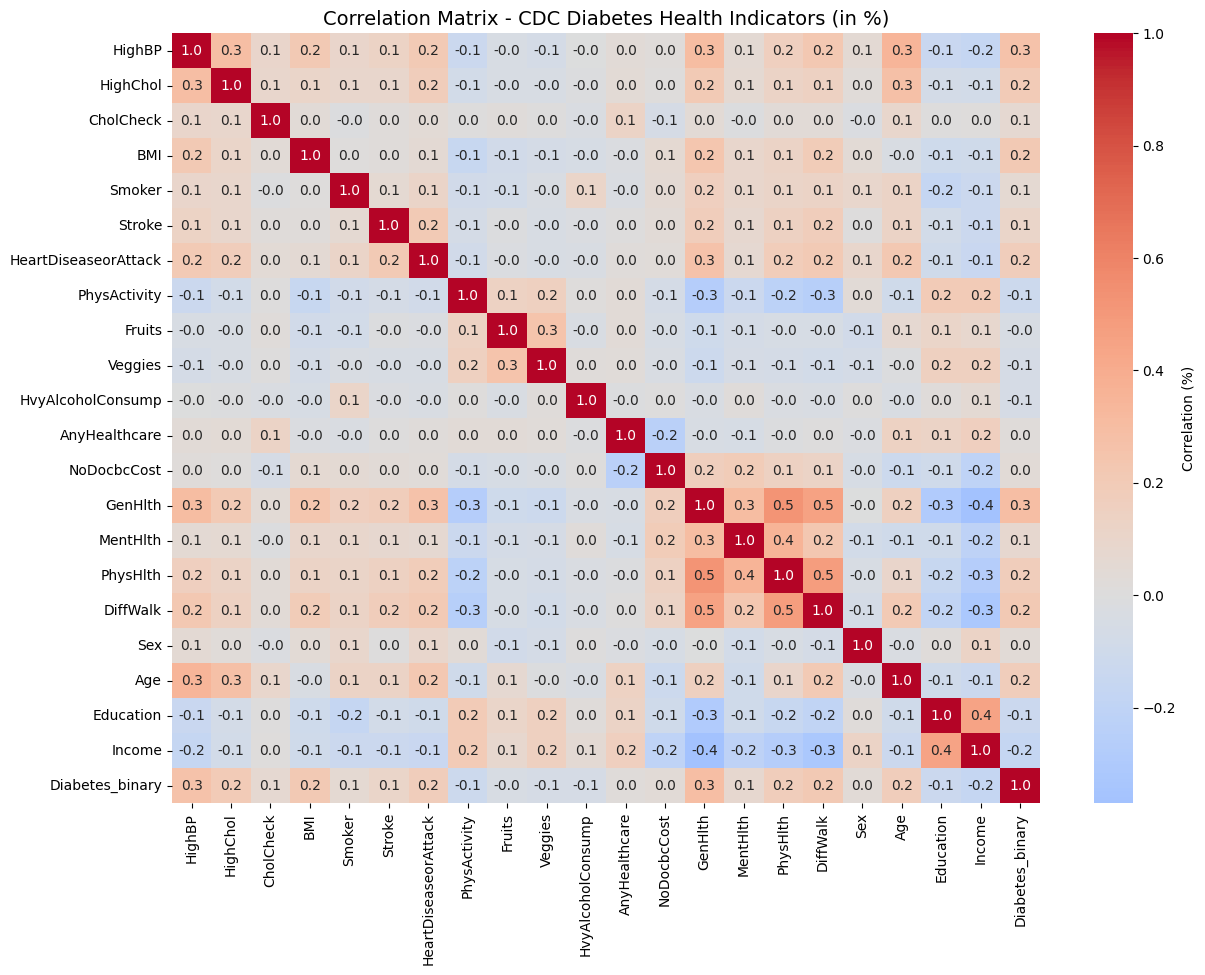

In [92]:


# Compute correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))

sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            fmt=".1f",
            center=0,
            cbar_kws={'label': 'Correlation (%)'})



plt.title('Correlation Matrix - CDC Diabetes Health Indicators (in %)', fontsize=14)
plt.show()



# Correlation of features show that feature


# *   GenHlth and PhysHlth are highly correleted with each other.(positive relation)
# *   GenHlth and Income are highly correleted with each other .(negetive relation)



# **Correlation Of the feature with Diabetese**

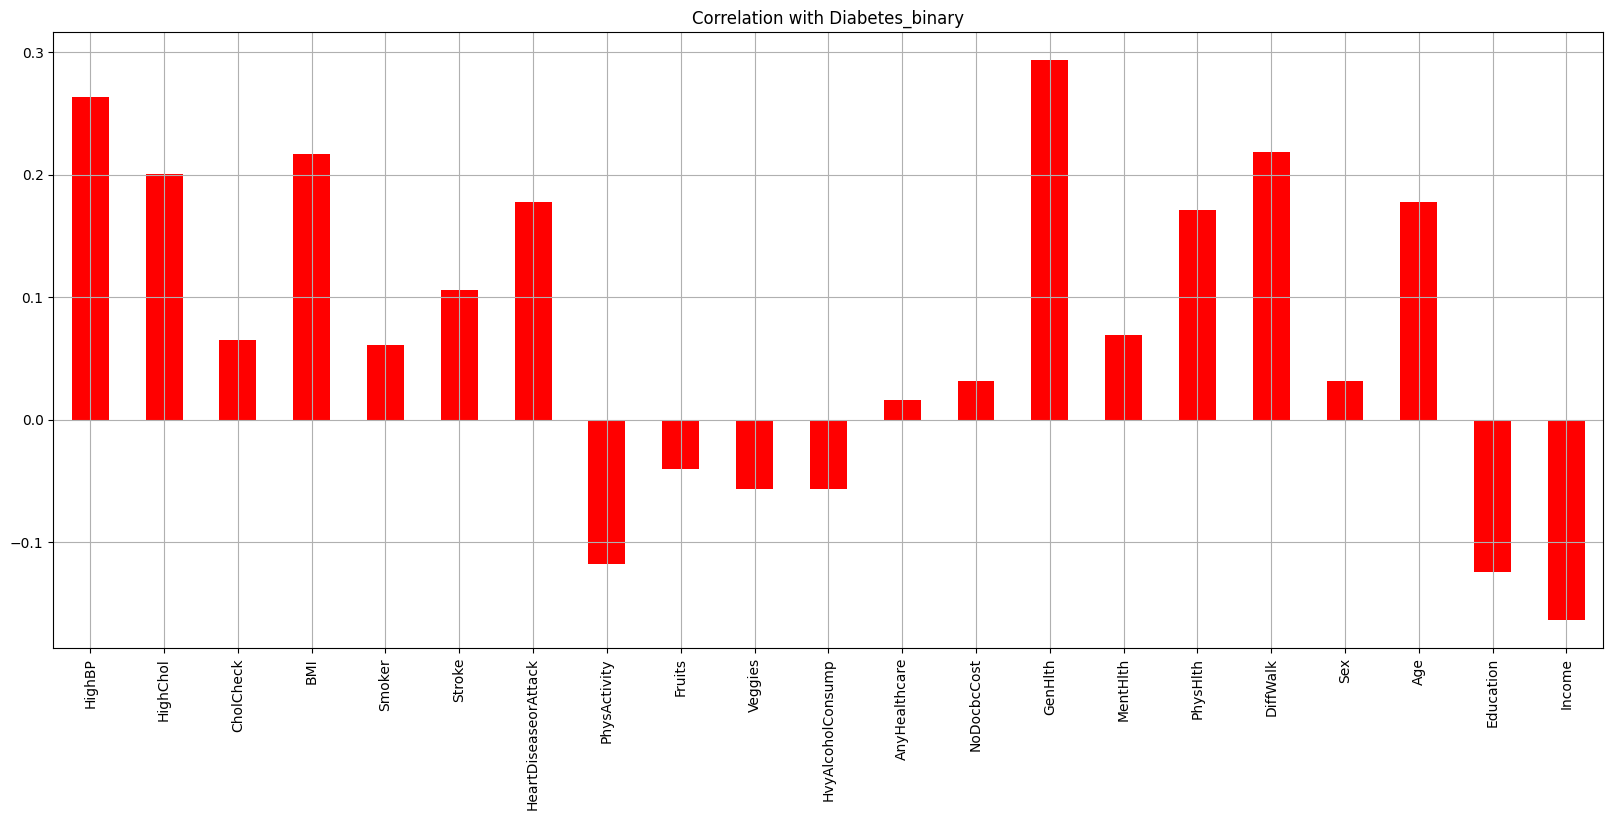

In [93]:
new_df=df.drop('Diabetes_binary', axis=1)
corr_values = new_df.corrwith(df['Diabetes_binary'])


corr_values.plot(kind='bar', grid=True, figsize=(20, 8),
                 title="Correlation with Diabetes_binary", color="red")

plt.show()

# **Finding the Imbalace OF DATA**

# **Data is Imbalanced**

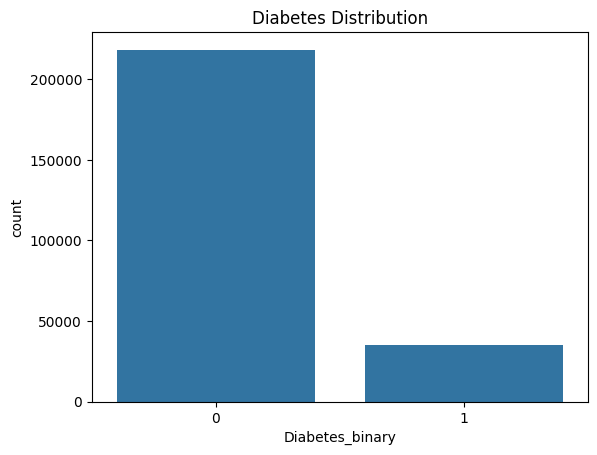

,proportion
Diabetes_binary,
0,86.066698
1,13.933302


In [94]:
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Diabetes Distribution')
plt.show()

# Percentage distribution
df['Diabetes_binary'].value_counts(normalize=True) * 100


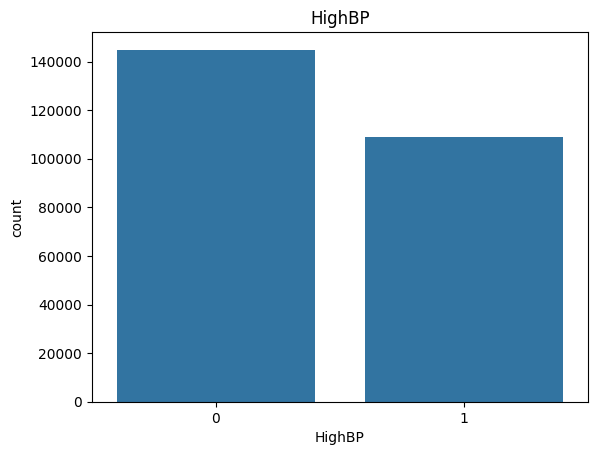

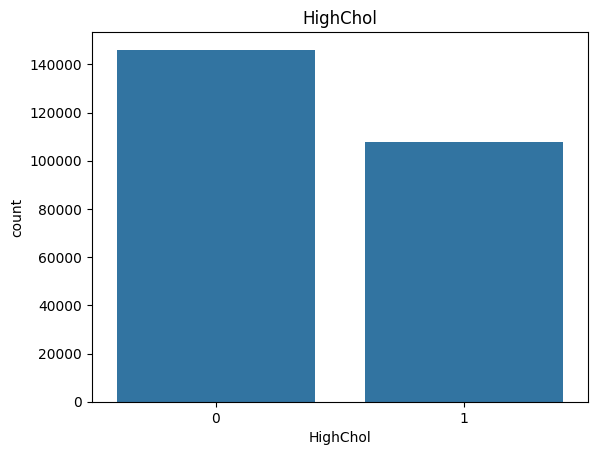

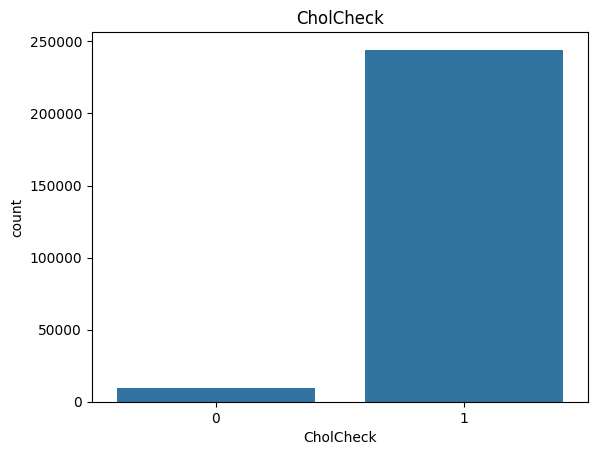

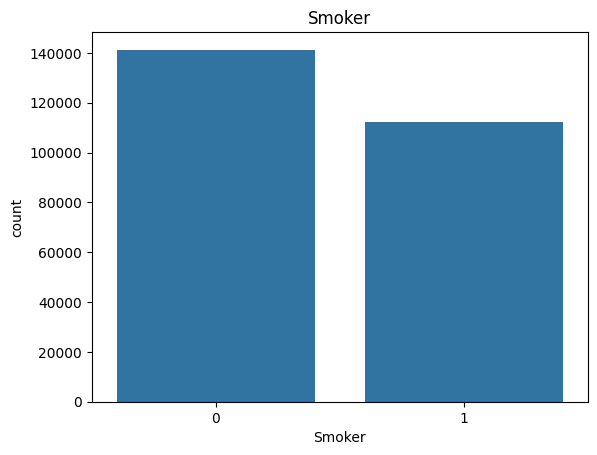

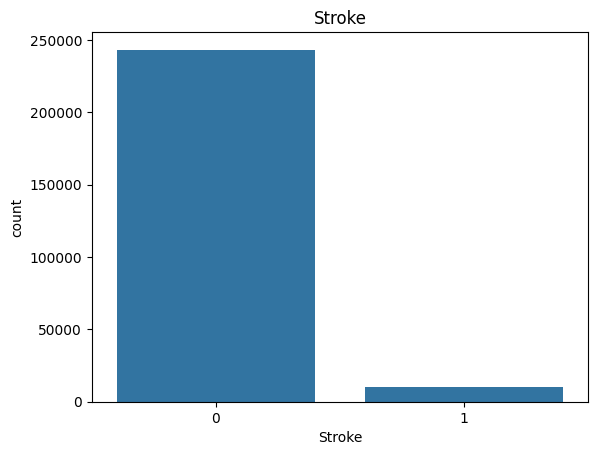

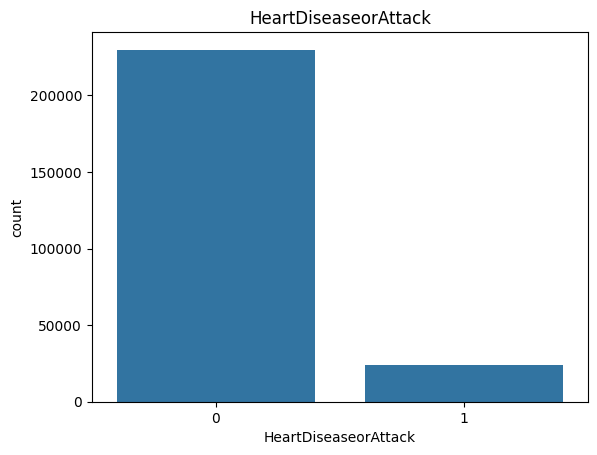

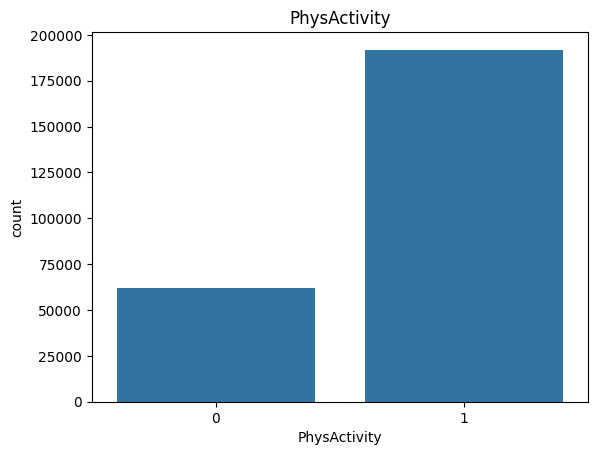

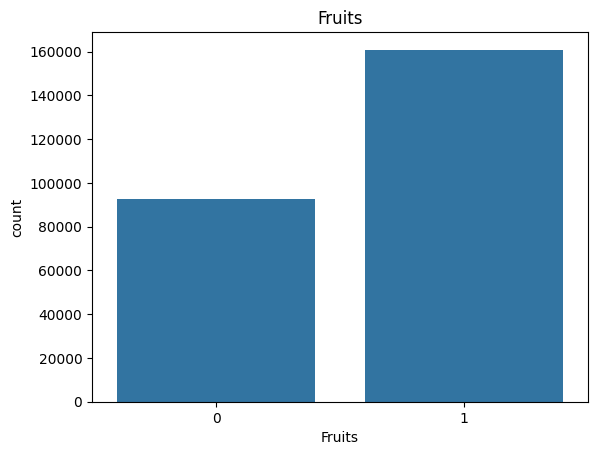

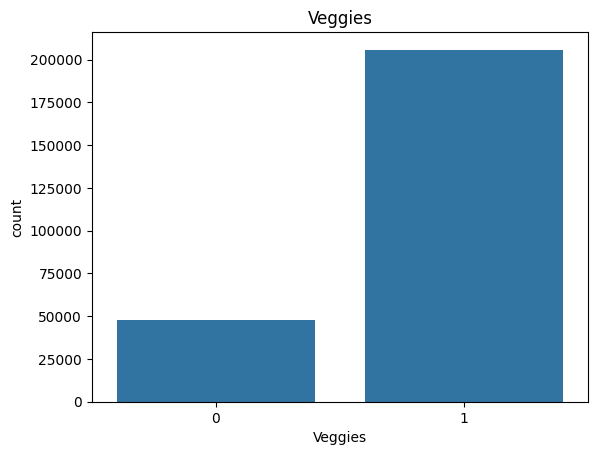

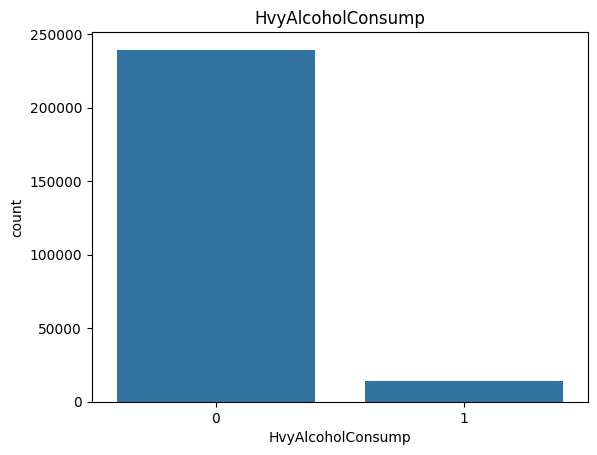

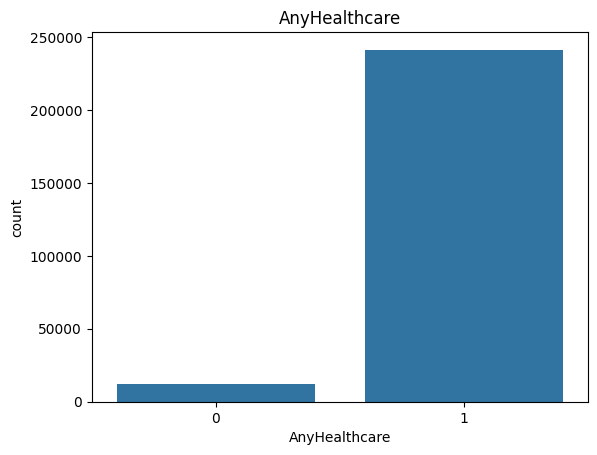

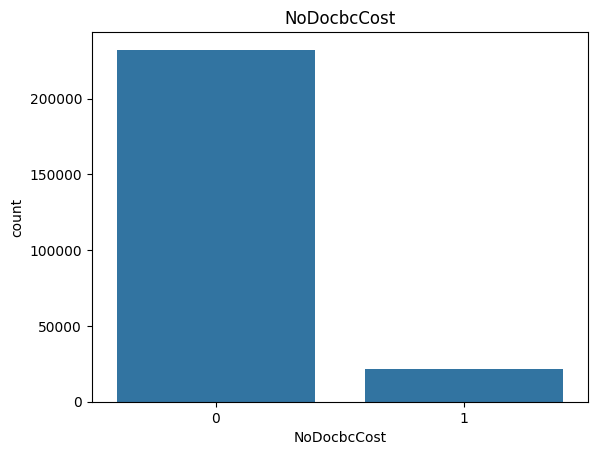

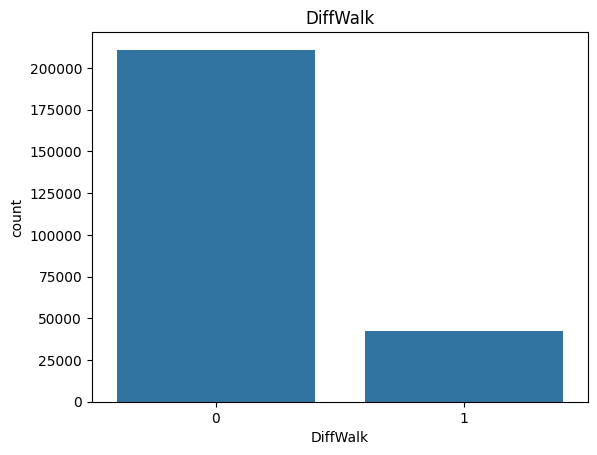

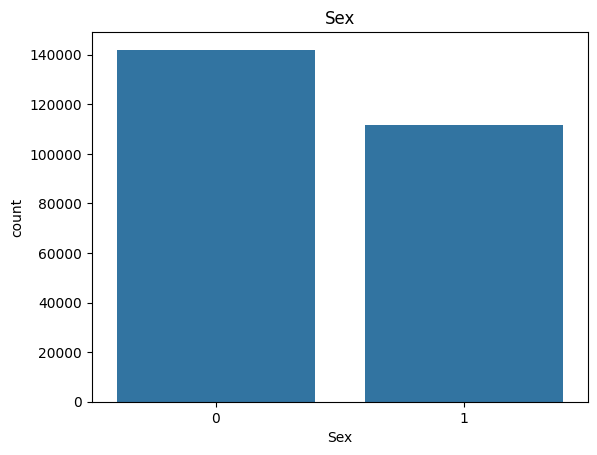

In [95]:
binary_cols = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
               'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare',
               'NoDocbcCost','DiffWalk','Sex']

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()


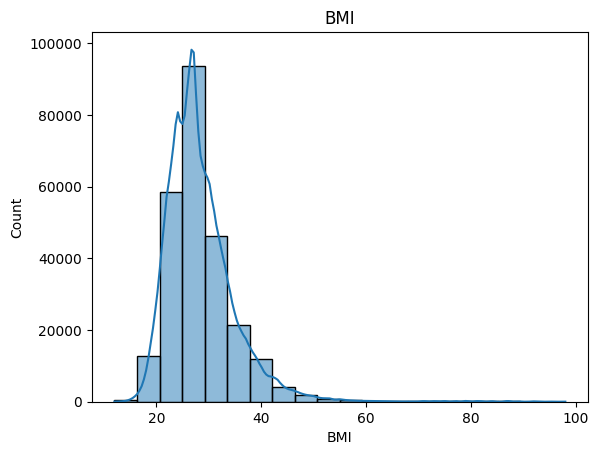

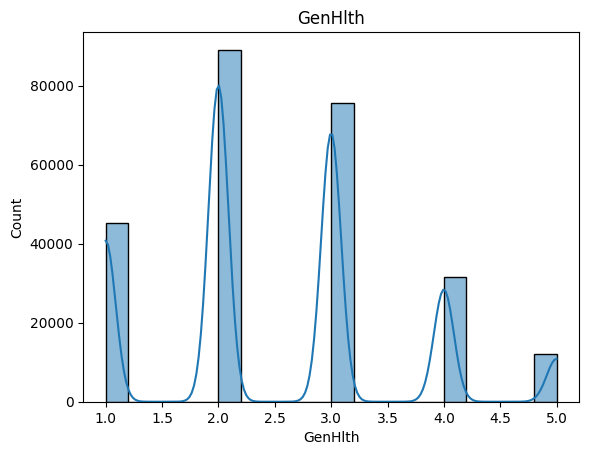

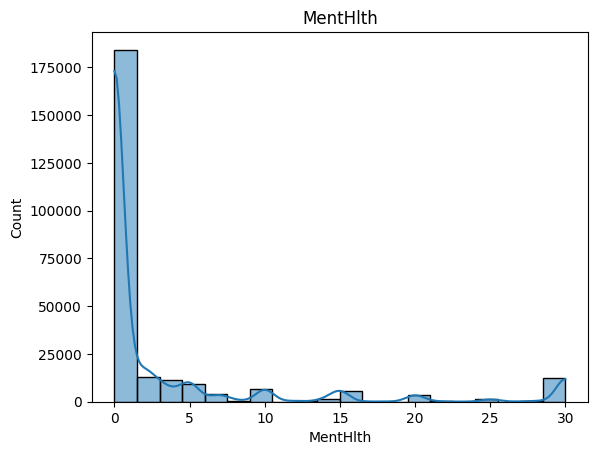

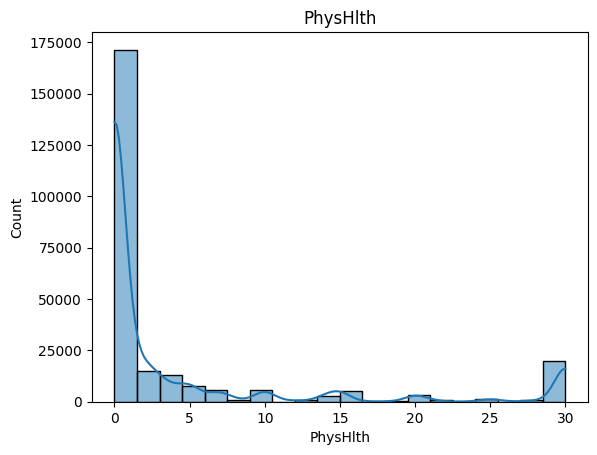

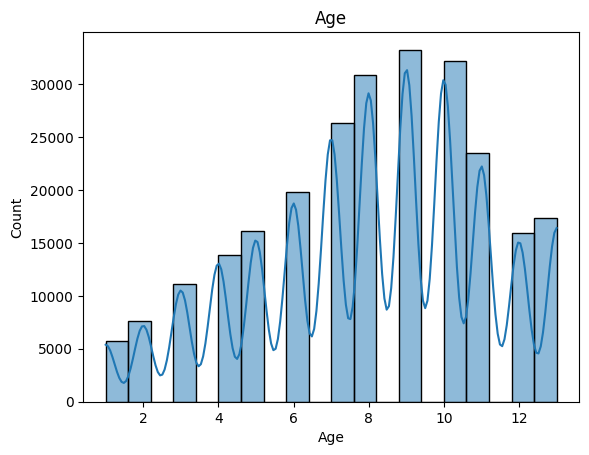

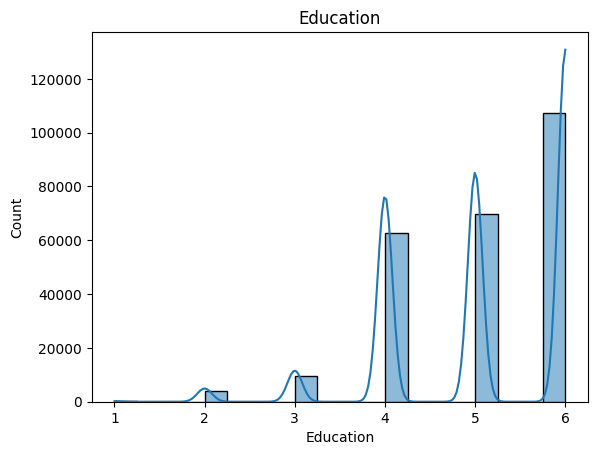

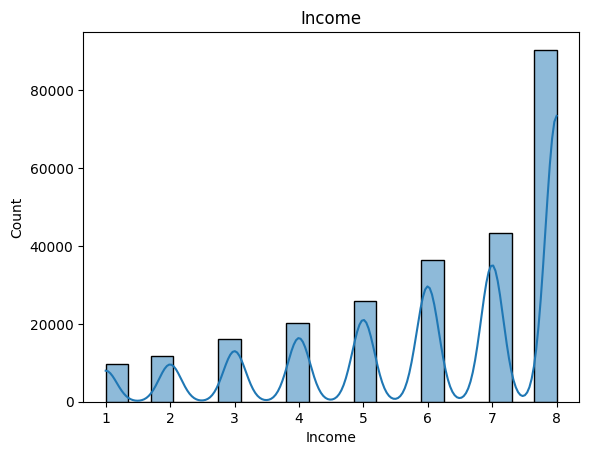

In [96]:
num_cols = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']

df[num_cols].describe()

for col in num_cols:
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
    plt.show()


# **Relation b/w Each Feature and Diabatese**

# Like High col ===>> diabetese

# **I have taken Each Feature for example for each high_Bp I have shown that what % of high_Bp patients have diabetese**


# **This will show mw which feature tend to cause diabetese more**

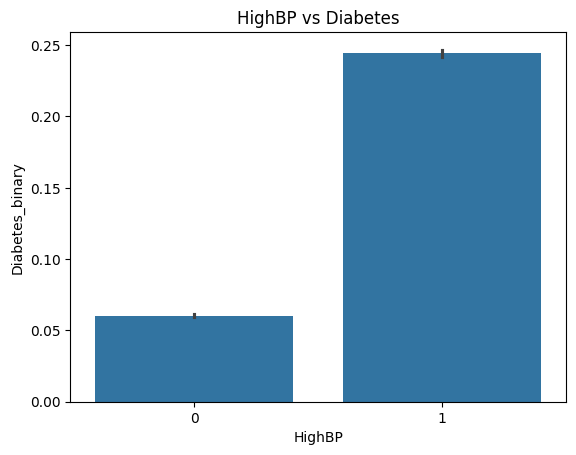

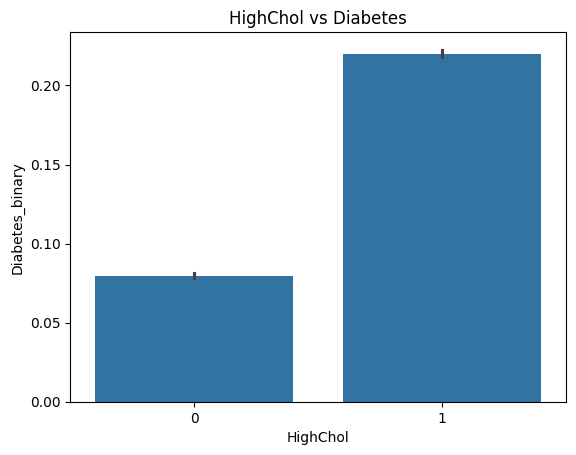

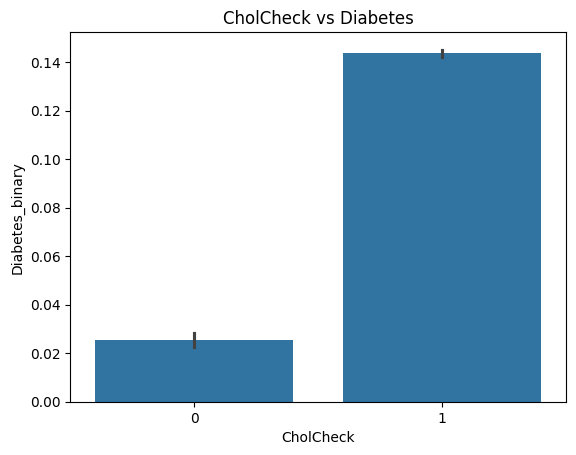

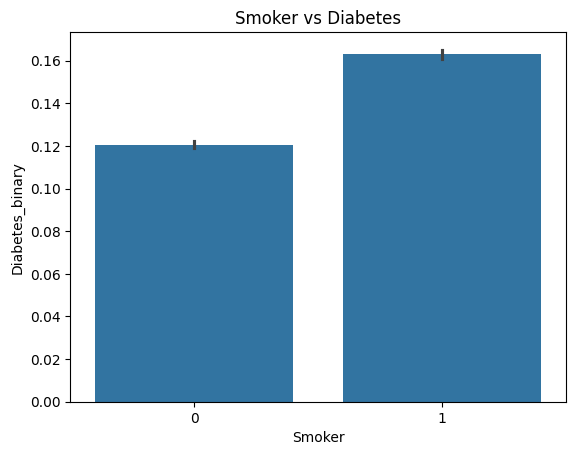

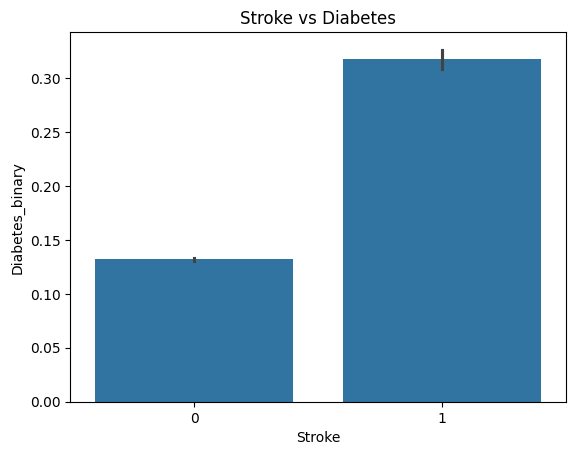

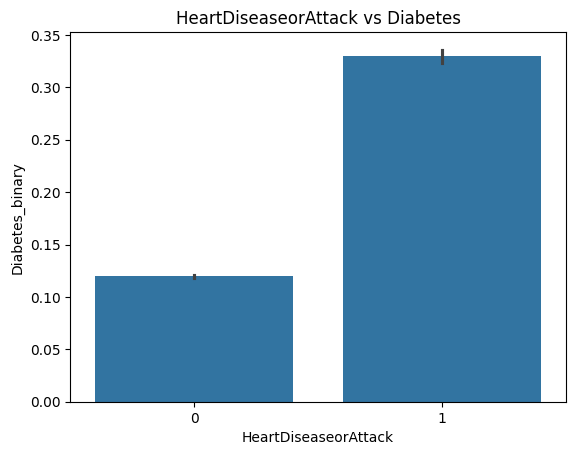

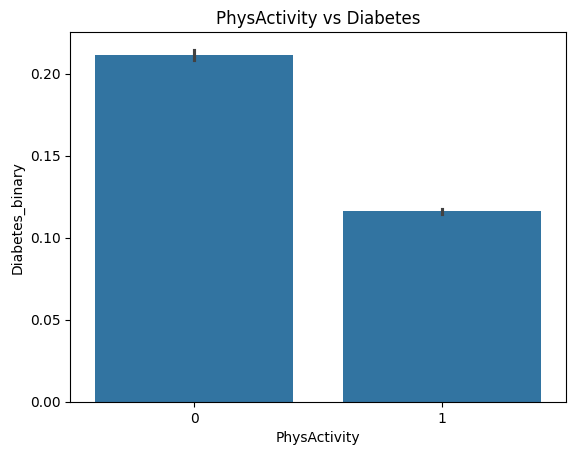

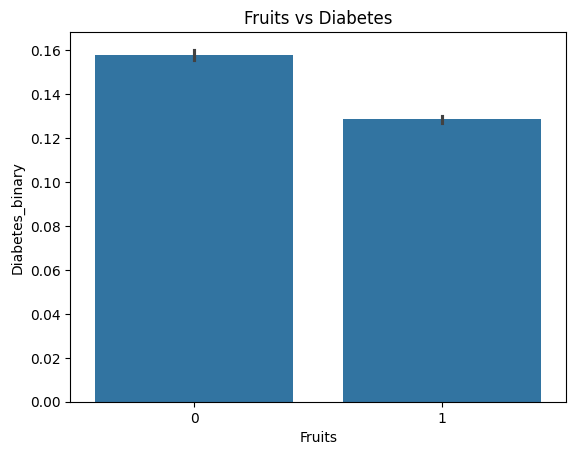

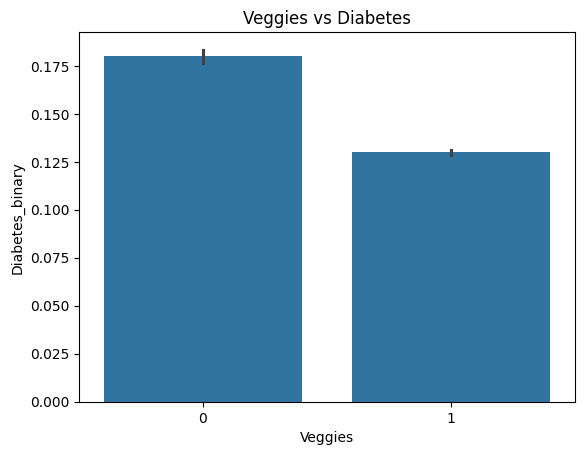

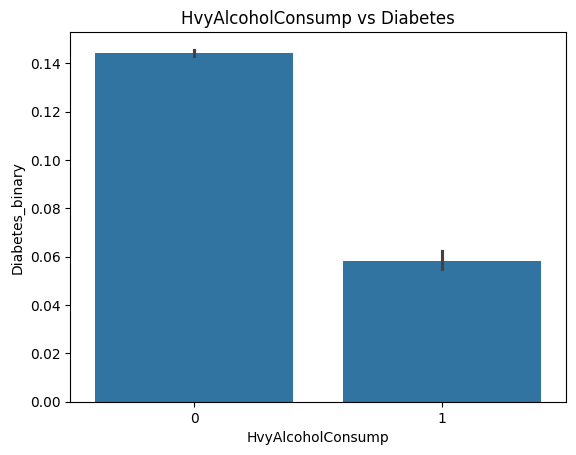

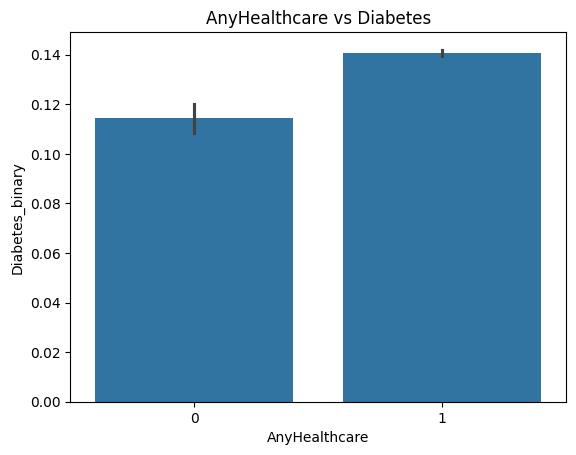

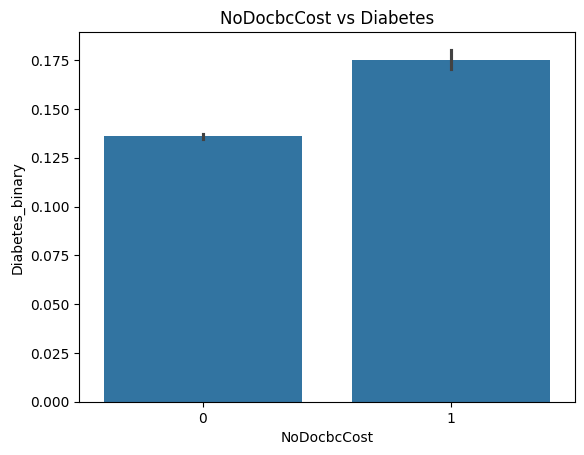

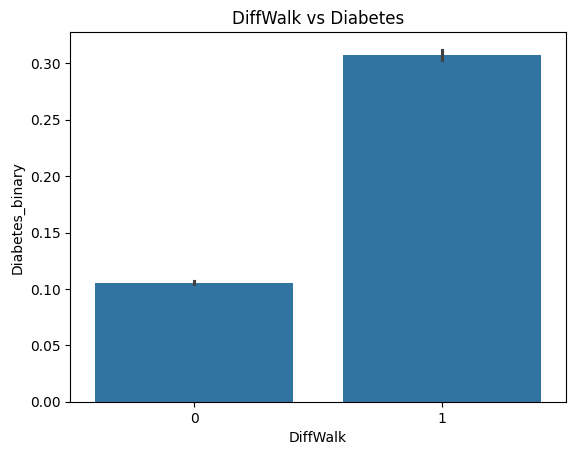

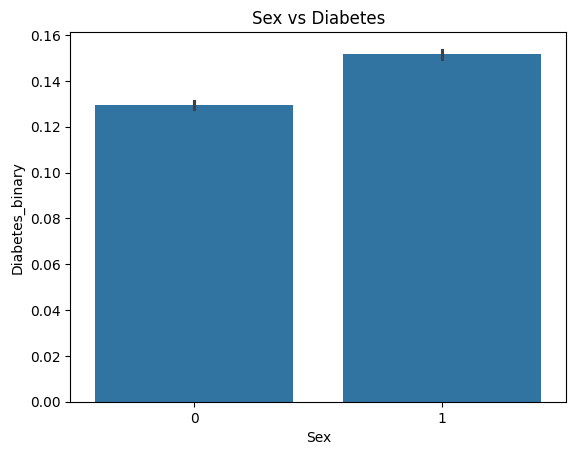

In [97]:
for col in binary_cols:
    sns.barplot(x=col, y='Diabetes_binary', data=df)
    plt.title(f'{col} vs Diabetes')
    plt.show()


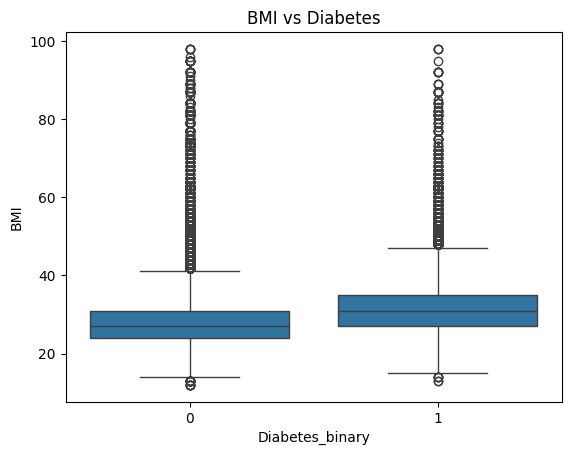

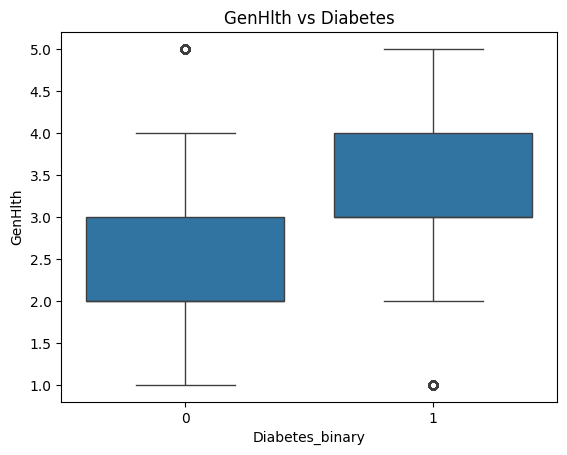

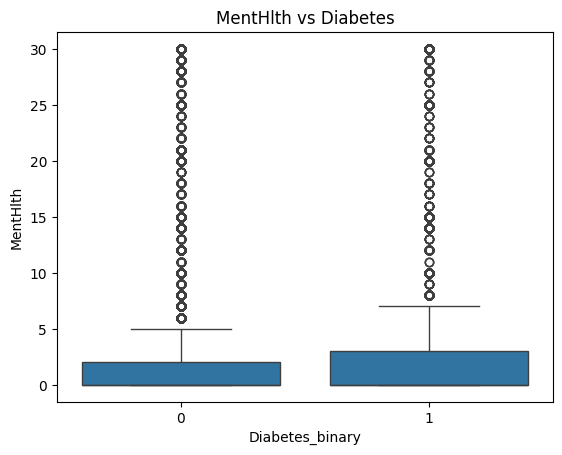

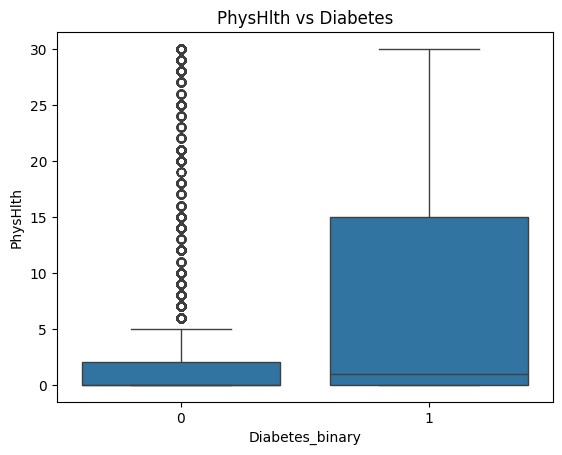

In [98]:
for col in ['BMI','GenHlth','MentHlth','PhysHlth']:
    sns.boxplot(x='Diabetes_binary', y=col, data=df)
    plt.title(f'{col} vs Diabetes')
    plt.show()


# This Plot is A great obervation point with **low age** if you have **High BMI** then its great chance that you will be having **Diabetese** Chance

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


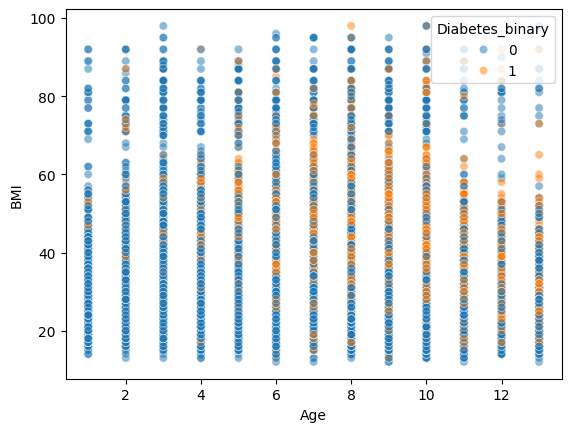

In [99]:
sns.scatterplot(x='Age', y='BMI', hue='Diabetes_binary', data=df, alpha=0.5)
plt.show()


In [100]:
# |---------|---------|---------|---------|---------|
#  Min      Q1       Median    Q3        Max
# This is a box boplot representation
# It help us to Identify the ouliers in the dataset

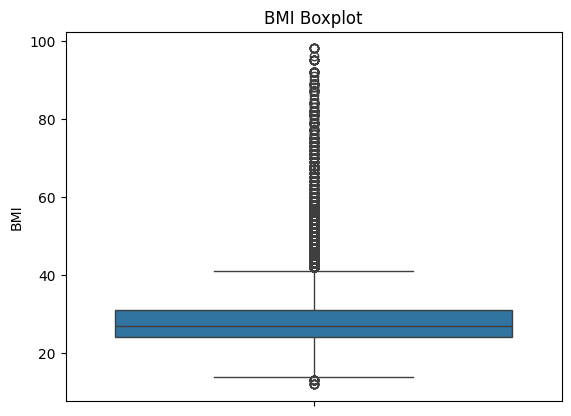

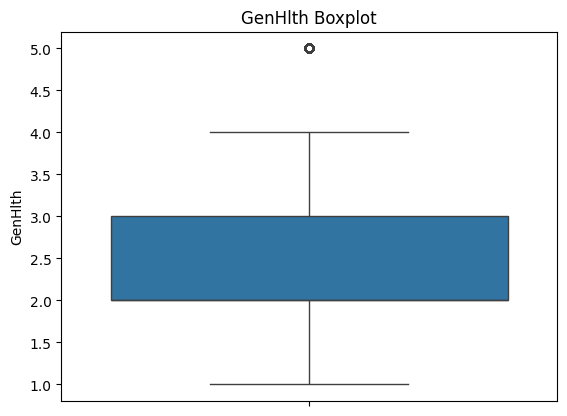

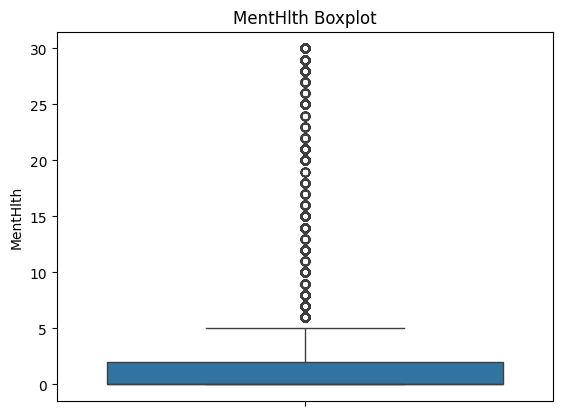

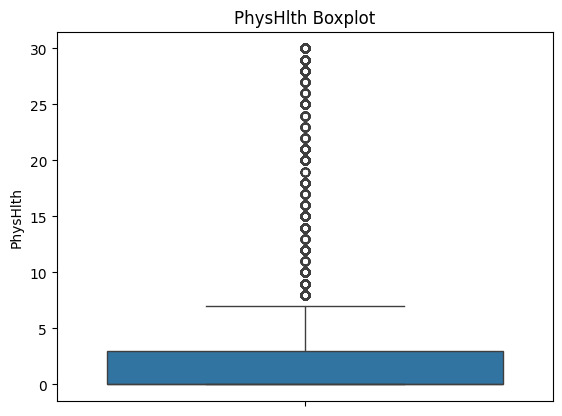

In [101]:
for col in ['BMI','GenHlth','MentHlth','PhysHlth']:
    sns.boxplot(df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


In [102]:
# |---------|---------|---------|---------|---------|
#  Min      Q1       Median    Q3        Max
# This is a box boplot representation
# It help us to Identify the ouliers in the dataset
# Only for continus data

# **Preprocessing:**

# **By observing the disbalnce in the samples. we applied SMOTE (Synthetic Minority Over-sampling TEchnique) [This is a very common and effective method. It creates new synthetic samples of the minority class.]**

# **This we did for training purpose as smote is not applied to test set.**

In [103]:
from imblearn.over_sampling import SMOTE

# **Scale numeric features**


* #  **Features like BMI, GenHlth, MentHlth, PhysHlth are on different scales**
*  #  **We scale them to mean=0, std=1**


In [104]:
numeric_cols = ['BMI','GenHlth','MentHlth','PhysHlth']



# **For simplicity, we can cap values at 1st and 99th percentile(can take or not)**

# **I am removing the outliers to reduce the negative impact of extreme outliers on the model**

In [105]:
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)


# **Feature Engineering**

* #  **Combine HighBP + HighChol → CardioRisk**

# **[Reason] : Both HighBP and HighChol are major risk factors for heart disease, which itself is strongly linked to diabetes.**

* #  **Combine Fruits + Veggies → HealthyDiet**

# **[Reason] : If a person takes both thing on regular basis then he is taking a healty diet. This will keep his health good.**



In [106]:
df['HealthyDiet'] = df['Fruits'] & df['Veggies']  # 1 if eats both, else 0
df['CardioRisk'] = df['HighBP'] | df['HighChol']   # 1 if either high, else 0


# **Making of ML MODELS !!!!**

In [107]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,HealthyDiet,CardioRisk
0,1,1,1,40,1,0,0,0,0,1,...,18,15,1,0,9,4,3,0,0,1
1,0,0,0,25,1,0,0,1,0,0,...,0,0,0,0,7,6,1,0,0,0
2,1,1,1,28,0,0,0,0,1,0,...,30,30,1,0,9,4,8,0,0,1
3,1,0,1,27,0,0,0,1,1,1,...,0,0,0,0,11,3,6,0,1,1
4,1,1,1,24,0,0,0,1,1,1,...,3,0,0,0,11,5,4,0,1,1


# **Preparing Data for ML model**

In [108]:
X = df.drop(columns=['Diabetes_binary'])
Y=df['Diabetes_binary']

# Spltting into train and test set

from sklearn.model_selection import train_test_split

# standard split: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [109]:
for col in X.columns:
    train_mean = X_train[col].mean()
    train_std = X_train[col].std()

    X_train[col] = (X_train[col] - train_mean) / train_std
    X_test[col] = (X_test[col] - train_mean) / train_std


# **Logistic regrssion**

In [110]:
import time
time1=time.time()

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)



Accuracy: 0.867135761589404
0.9470279216766357


In [111]:
import time
time1=time.time()
dt = DecisionTreeClassifier(max_depth=5,random_state=42)

dt.fit(X_train, Y_train)

dt_pred = dt.predict(X_test)

accuracy = accuracy_score(Y_test, dt_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)

Accuracy: 0.8661305581835383
0.7655446529388428


In [112]:
import time
time1=time.time()
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, random_state=42)

bagging.fit(X_train, Y_train)

bag_pred = bagging.predict(X_test)

accuracy = accuracy_score(Y_test, bag_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)

Accuracy: 0.8662093976663513
4.036449193954468


In [113]:
import time
time1=time.time()
rf = RandomForestClassifier(n_estimators=30, random_state=42)

rf.fit(X_train, Y_train)

rf_pred = rf.predict(X_test)

accuracy = accuracy_score(Y_test, rf_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)

Accuracy: 0.8574385052034059
11.436962127685547


In [114]:
# SVM=svm.SVC()

# SVM.fit(X_train, Y_train)

# SVM_pred = SVM.predict(X_test)

# accuracy = accuracy_score(Y_test, SVM_pred)
# print(f"Accuracy: {accuracy:.2f}")

In [115]:
import time
time1=time.time()
SVM=svm.LinearSVC()

SVM.fit(X_train, Y_train)

SVM_pred = SVM.predict(X_test)

accuracy = accuracy_score(Y_test, SVM_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)

Accuracy: 0.8664853358561968
1.2615444660186768


In [116]:
# In this n*d we multiply d*x
# which makes the matrix n*x i.e. n sample and x features

# JL random projection matrix
# for projection from d(dim)-->x(dim)
def create_jl_matrix(d, x):
    '''
        d: original dimension
        x: target dimension

    '''
    # entries from N(0, 1/x)
    M = np.random.randn(d, x) / np.sqrt(x)
    # np.random.randn creates a matrix of d*x
    # each sample is sample from N(0,1) and /root(x)

    # lets assume Z ~ N(0,1)
    # then 1/root(x)*Z ~ N(0,1/x)
    '''
        M: d × x random projection matrix
    '''
    return M

In [117]:
d = X_train.shape[1]
x = 1
M = create_jl_matrix(d, x)
X_train_proj = X_train @ M
X_test_proj  = X_test @ M
print(X_train_proj.shape)
print(X_test_proj.shape)

(202944, 1)
(50736, 1)


In [118]:
import time
time1=time.time()
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train_proj, Y_train)

Y_pred = log_reg.predict(X_test_proj)


accuracy = accuracy_score(Y_test, Y_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)
# 0.8658940397350994

Accuracy: 0.8620900346893724
0.13251018524169922


In [119]:
import time
time1=time.time()
dt = DecisionTreeClassifier(max_depth=5,random_state=42)

dt.fit(X_train_proj, Y_train)

dt_pred = dt.predict(X_test_proj)

accuracy = accuracy_score(Y_test, dt_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)

Accuracy: 0.8619914853358562
0.4249136447906494


In [120]:
import time
time1=time.time()
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, random_state=42)

bagging.fit(X_train_proj, Y_train)

bag_pred = bagging.predict(X_test_proj)

accuracy = accuracy_score(Y_test, bag_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)

Accuracy: 0.8620900346893724
2.630150079727173


In [121]:
import time
time1=time.time()
rf = RandomForestClassifier(n_estimators=1, random_state=42)

rf.fit(X_train_proj, Y_train)

rf_pred = rf.predict(X_test_proj)

accuracy = accuracy_score(Y_test, rf_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)

Accuracy: 0.7679556922106591
1.3573009967803955


In [122]:
import time
time1=time.time()
SVM=svm.LinearSVC()

SVM.fit(X_train_proj, Y_train)

SVM_pred = SVM.predict(X_test_proj)

accuracy = accuracy_score(Y_test, SVM_pred)
time2=time.time()
print(f"Accuracy: {accuracy}")
print(time2-time1)


Accuracy: 0.8620900346893724
0.06696176528930664


# **SVD part**


In [123]:
from sklearn.decomposition import TruncatedSVD

k = 10

svd = TruncatedSVD(n_components=k, random_state=42)
svd.fit(X_train)

X_train_proj = svd.transform(X_train)
X_test_proj  = svd.transform(X_test)

print(X_train_proj.shape, X_test_proj.shape)


(202944, 10) (50736, 10)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_proj, Y_train)

y_pred = log_reg.predict(X_test_proj)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.865874329864396


In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_proj, Y_train)

dt_pred = dt.predict(X_test_proj)
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_pred))


Decision Tree Accuracy: 0.8626024913276569


In [126]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC(random_state=42)
svm.fit(X_train_proj, Y_train)

svm_pred = svm.predict(X_test_proj)
print("Linear SVM Accuracy:", accuracy_score(Y_test, svm_pred))


Linear SVM Accuracy: 0.8655786818038473


# **Sampling**

In [127]:
import numpy as np

k = 20
np.random.seed(42)

#arbitary picking of k rands
sampled_cols = np.random.choice(X_train.columns, size=k, replace=False)

X_train_samp = X_train[sampled_cols]
X_test_samp  = X_test[sampled_cols]

print(X_train_samp.shape, X_test_samp.shape)


(202944, 20) (50736, 20)


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_samp, Y_train)

y_pred = log_reg.predict(X_test_samp)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8665444654683065


# **Hypothesis Testing**

In [129]:
import math
# Utilities
def print_block(title, text):
    print("\n" + "="*80)
    print(title)
    print("="*80)
    print(text)

def cramers_v(table):
    chi2, p, dof, exp = stats.chi2_contingency(table)
    n = table.values.sum()
    return np.sqrt(chi2 / (n * (min(table.shape)-1))) if min(table.shape)>1 else np.nan, chi2, p, dof, exp

def cohen_d(x, y):
    x = np.asarray(x); y = np.asarray(y)
    nx, ny = len(x), len(y)
    mx, my = x.mean(), y.mean()
    vx = x.var(ddof=1); vy = y.var(ddof=1)
    pooled = math.sqrt(((nx-1)*vx + (ny-1)*vy) / (nx+ny-2)) if nx+ny-2>0 else np.nan
    return (mx - my)/pooled if pooled>0 else np.nan

def hosmer_lemeshow(y_true, y_prob, groups=10):
    # groups: number of bins (deciles usual)
    data = pd.DataFrame({'y': y_true, 'p': y_prob})
    data['bin'] = pd.qcut(data['p'], groups, duplicates='drop')
    obs = data.groupby('bin')['y'].sum()
    n = data.groupby('bin')['y'].count()
    exp = data.groupby('bin')['p'].sum()
    # expected successes = sum p_i ; expected failures = n - exp
    with np.errstate(divide='ignore', invalid='ignore'):
        chi2 = ((obs - exp)**2 / (exp)).replace([np.inf, -np.inf], 0).sum() + \
               (((n - obs) - (n - exp))**2 / (n - exp)).replace([np.inf, -np.inf], 0).sum()
    dof = groups - 2
    p = 1 - stats.chi2.cdf(chi2, dof) if dof>0 else np.nan
    return chi2, dof, p, pd.DataFrame({'n': n, 'obs': obs, 'exp': exp}).reset_index()

# Quick dataset info
N = df.shape[0]
print_block("DATA SUMMARY", f"Rows: {N}\nColumns: {df.shape[1]}\nDiabetes count = {df['Diabetes_binary'].sum()} ({df['Diabetes_binary'].mean():.3f})")

# ----------------------------
# 1) Proportion z-test (population proportion)
# ----------------------------
p0 = 0.10  # null prevalence you can change
count = int(df['Diabetes_binary'].sum())
stat, p = proportions_ztest(count, N, value=p0, alternative='two-sided')
text = (
    f"H0: diabetes prevalence = {p0}\n"
    f"H1: diabetes prevalence != {p0}\n"
    f"Observed: {count}/{N} = {count/N:.4f}\n"
    f"z = {stat:.3f}, p = {p:.3e}\n"
    f"Interpretation: {'reject H0' if p < 0.05 else 'fail to reject H0'}"
)
print_block("Z-TEST FOR PROPORTION — DIABETES PREVALENCE", text)

# ----------------------------
# 2) Normality & variance checks for BMI (assumptions)
# ----------------------------
bmi = pd.to_numeric(df['BMI'], errors='coerce').dropna()
n_bmi = len(bmi)
sample_n = min(5000, n_bmi)
sh_w, sh_p = stats.shapiro(bmi.sample(sample_n, random_state=1)) if n_bmi>=3 else (np.nan,np.nan)
# Levene of BMI across Diabetes groups
grp0 = df.loc[df['Diabetes_binary']==0, 'BMI'].dropna().astype(float)
grp1 = df.loc[df['Diabetes_binary']==1, 'BMI'].dropna().astype(float)
lev_stat, lev_p = stats.levene(grp0, grp1, center='median') if len(grp0)>1 and len(grp1)>1 else (np.nan, np.nan)
txt = (
    f"Shapiro-Wilk on sample of BMI (n={sample_n}): W={sh_w:.4f}, p={sh_p:.3e}\n"
    f"Levene test (BMI variance by Diabetes) median-center: stat={lev_stat:.4f}, p={lev_p:.3e}\n"
    "Note: For very large n Shapiro is sensitive; use skew/kurtosis and robust tests."
)
print_block("ASSUMPTION CHECKS — BMI NORMALITY & VARIANCE", txt)

# ----------------------------
# 3) Welch two-sample t-test (BMI by Diabetes) + Cohen's d + Mann-Whitney
# ----------------------------
# H0: mean BMI equal
t_stat, t_p = stats.ttest_ind(grp1, grp0, alternative='two-sided', equal_var=False)
d = cohen_d(grp1, grp0)
u_stat, u_p = stats.mannwhitneyu(grp1, grp0, alternative='two-sided')
txt = (
    "H0: mean(BMI | Diabetes=1) == mean(BMI | Diabetes=0)\n"
    "H1: means differ\n"
    f"Welch t: t={t_stat:.4f}, p={t_p:.3e}, n1={len(grp1)}, n0={len(grp0)}\n"
    f"Cohen's d (group1 - group0) = {d:.3f}\n"
    f"Mann–Whitney U: U={u_stat:.3e}, p={u_p:.3e}\n"
    f"Interpretation: {'reject H0' if t_p<0.05 else 'fail to reject H0'}. "
    "Mann–Whitney agrees as nonparametric robustness check."
)
print_block("TWO-SAMPLE T-TEST (WELCH) — BMI BY DIABETES (with Mann–Whitney robustness)", txt)

# ----------------------------
# 4) Kruskal-Wallis for GenHlth (ordinal) vs Diabetes
# ----------------------------
if 'GenHlth' in df.columns:
    gen0 = df.loc[df['Diabetes_binary']==0, 'GenHlth'].dropna().astype(float)
    gen1 = df.loc[df['Diabetes_binary']==1, 'GenHlth'].dropna().astype(float)
    if len(gen0)>0 and len(gen1)>0:
        h_stat, h_p = stats.kruskal(gen0, gen1)
        med0, med1 = gen0.median(), gen1.median()
        txt = (
            "H0: distribution of GenHlth identical across Diabetes groups\n"
            "H1: distributions differ\n"
            f"Kruskal H={h_stat:.4f}, p={h_p:.3e}\n"
            f"Median(GenHlth | Diabetes=0)={med0}, Median(GenHlth | Diabetes=1)={med1}\n"
            f"Interpretation: {'reject H0' if h_p<0.05 else 'fail to reject H0'}"
        )
    else:
        txt = "Insufficient data to run Kruskal-Wallis."
else:
    txt = "GenHlth column missing; skipped."
print_block("KRUSKAL–WALLIS — GENHLTH (ORDINAL) vs DIABETES", txt)

# ----------------------------
# 5) Chi-square independence tests + Cramer's V for selected categorical predictors
# ----------------------------
chi_vars = ['Smoker','PhysActivity','HighBP','HighChol','HeartDiseaseorAttack','Sex','Income','Education','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','CholCheck','DiffWalk']
chi_present = [v for v in chi_vars if v in df.columns]
chi_results = []
for v in chi_present:
    table = pd.crosstab(df['Diabetes_binary'], df[v])
    cv, chi2, pval, dof, exp = cramers_v(table)
    # show proportions
    prop_table = (table.T / table.sum(axis=1)).T  # row proportions (by diabetes)
    txt = (
        f"H0: {v} independent of Diabetes\n"
        f"H1: {v} associated with Diabetes\n"
        f"chi2={chi2:.3f}, dof={dof}, p={pval:.3e}, Cramer's V={cv:.3f}\n"
        f"Counts (Diabetes=0 vs 1):\n{table.to_string()}\n"
        f"Row proportions (diabetes rows):\n{prop_table.round(3).to_string()}\n"
        f"Interpretation: {'reject H0' if pval<0.05 else 'fail to reject H0'}"
    )
    print_block(f"CHI-SQUARE — {v} vs DIABETES", txt)
    chi_results.append((v, pval, cv))

# FDR correction across these chi tests
if chi_results:
    pvals = [r[1] for r in chi_results]
    rejected, qvals, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
    fr = pd.DataFrame({'variable':[r[0] for r in chi_results], 'p':pvals, 'q(FDR)':qvals, 'reject(FDR)':rejected})
    print_block("FDR ADJUSTMENT FOR CHI-SQUARE TESTS", fr.to_string(index=False))

# ----------------------------
# 6) Spearman correlation: BMI vs PhysHlth and BMI vs MentHlth (monotonic)
# ----------------------------
for target in ['PhysHlth','MentHlth']:
    if target in df.columns:
        a = pd.to_numeric(df['BMI'], errors='coerce')
        b = pd.to_numeric(df[target], errors='coerce')
        valid = a.notna() & b.notna()
        if valid.sum() >= 4:
            rho, pval = stats.spearmanr(a[valid], b[valid])
            txt = (
                f"H0: no monotonic correlation (rho=0)\n"
                f"H1: monotonic correlation exists\n"
                f"Spearman rho = {rho:.3f}, p = {pval:.3e}, N = {valid.sum()}\n"
                f"Interpretation: {'reject H0' if pval<0.05 else 'fail to reject H0'}"
            )
        else:
            txt = f"Not enough paired values for BMI vs {target} ({valid.sum()})."
    else:
        txt = f"{target} missing; skipped."
    print_block(f"SPEARMAN CORRELATION — BMI vs {target}", txt)

# ----------------------------
# 7) Variance test (Levene reported earlier). Also classical F-test for two groups (informational)
# ----------------------------
if len(grp0)>1 and len(grp1)>1:
    var0, var1 = grp0.var(ddof=1), grp1.var(ddof=1)
    F = var1/var0 if var0>0 else np.nan
    dfn = len(grp1)-1; dfd = len(grp0)-1
    # two-tailed p-value for F
    p_f = 2 * min(stats.f.cdf(F, dfn, dfd), 1 - stats.f.cdf(F, dfn, dfd))
    txt = (
        f"Classical F-test (var(Diabetes=1)/var(Diabetes=0)) = {F:.3f}\n"
        f"dfn={dfn}, dfd={dfd}, approx two-sided p={p_f:.3e}\n"
        f"var1={var1:.4f}, var0={var0:.4f}\n"
        "Interpretation: use Welch t if variances unequal."
    )
else:
    txt = "Insufficient data for classical F-test."
print_block("VARIANCE CHECK — CLASSICAL F-TEST (informational)", txt)

# ----------------------------
# 8) Multiple testing summary (collect p-values we computed earlier)
# ----------------------------
collected = []
# proportion z-test
collected.append(('Prevalence_z', p))
# BMI t-test
collected.append(('BMI_t', t_p))
# Mann-Whitney
collected.append(('BMI_MWU', u_p))
# Kruskal GenHlth
if 'GenHlth' in df.columns and 'h_p' in locals():
    collected.append(('GenHlth_kruskal', h_p))
# chi-tests
for v,pval,cv in chi_results:
    collected.append((f"chi_{v}", pval))
# Spearman examples
for target in ['PhysHlth','MentHlth']:
    if target in df.columns:
        a = pd.to_numeric(df['BMI'], errors='coerce')
        b = pd.to_numeric(df[target], errors='coerce')
        valid = a.notna() & b.notna()
        if valid.sum() >= 4:
            rho,pval = stats.spearmanr(a[valid], b[valid])
            collected.append((f"spearman_BMI_{target}", pval))

if collected:
    names, pvals = zip(*collected)
    rejected, qvals, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
    df_mult = pd.DataFrame({'test': names, 'p': pvals, 'q(FDR)': qvals, 'reject(FDR)': rejected})
    print_block("MULTIPLE TESTING (Benjamini-Hochberg) — SUMMARY", df_mult.to_string(index=False))
else:
    print_block("MULTIPLE TESTING", "No p-values collected.")



DATA SUMMARY
Rows: 253680
Columns: 24
Diabetes count = 35346 (0.139)

Z-TEST FOR PROPORTION — DIABETES PREVALENCE
H0: diabetes prevalence = 0.1
H1: diabetes prevalence != 0.1
Observed: 35346/253680 = 0.1393
z = 57.208, p = 0.000e+00
Interpretation: reject H0

ASSUMPTION CHECKS — BMI NORMALITY & VARIANCE
Shapiro-Wilk on sample of BMI (n=5000): W=0.9364, p=6.591e-42
Levene test (BMI variance by Diabetes) median-center: stat=1847.7293, p=0.000e+00
Note: For very large n Shapiro is sensitive; use skew/kurtosis and robust tests.

TWO-SAMPLE T-TEST (WELCH) — BMI BY DIABETES (with Mann–Whitney robustness)
H0: mean(BMI | Diabetes=1) == mean(BMI | Diabetes=0)
H1: means differ
Welch t: t=107.7388, p=0.000e+00, n1=35346, n0=218334
Cohen's d (group1 - group0) = 0.692
Mann–Whitney U: U=5.312e+09, p=0.000e+00
Interpretation: reject H0. Mann–Whitney agrees as nonparametric robustness check.

KRUSKAL–WALLIS — GENHLTH (ORDINAL) vs DIABETES
H0: distribution of GenHlth identical across Diabetes groups
H